# Imports Stuff

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# wbpA Biosorption Values

In [19]:
# biosorption values for LL and LH environments (nmols)
LL_3190 = np.array([[7.537956697, 9.676257696, 9.234116607], 
                    [8.218045801, 10.17096496, 9.922854221], 
                    [7.3575131, 9.492634401, 9.143233135]])

LH_3190 = np.array([[8.065108713, 13.34418151, 11.11850999], 
                    [8.930298349, 14.18728569, 12.02908684], 
                    [8.46367707, 13.46006067, 11.38034334]])

LL_base = np.array([[21.49821398, 27.31581885, 26.75262717], 
                    [23.57777611, 28.78063997, 28.53262673], 
                    [20.99052399, 26.9582075, 26.31807033]]) * .35

LH_base = np.array([[23.03225834, 37.13685621, 32.76745749], 
                    [25.50430968, 39.80146632, 35.11328366], 
                    [23.76501929, 37.92669509, 33.46280301]]) * .35

# starting REE values for LL and LH environments (nmols)
starting_LL = np.array([32.32245348, 33.1899989,  34.52789255]) * .35
starting_LH = np.array([65.46658382, 67.26989139, 69.23052906]) * .35

# Distribution coefficients
LL_3190_Kds = LL_3190 / (starting_LL - LL_3190)
LH_3190_Kds = LH_3190 / (starting_LH - LH_3190)

LL_base_Kds = LL_base / (starting_LL - LL_base)
LH_base_Kds = LH_base / (starting_LH - LH_base)

# separation factor calculation
LL_3190_seps_EL = LL_3190_Kds[:,1] / LL_3190_Kds[:,0]
LL_3190_seps_YL = LL_3190_Kds[:,2] / LL_3190_Kds[:,0]
LL_3190_seps_YE = LL_3190_Kds[:,2] / LL_3190_Kds[:,1]

LH_3190_seps_EL = LH_3190_Kds[:,1] / LH_3190_Kds[:,0]
LH_3190_seps_YL = LH_3190_Kds[:,2] / LH_3190_Kds[:,0]
LH_3190_seps_YE = LH_3190_Kds[:,2] / LH_3190_Kds[:,1]

LL_base_seps_EL = LL_base_Kds[:,1] / LL_base_Kds[:,0]
LL_base_seps_YL = LL_base_Kds[:,2] / LL_base_Kds[:,0]
LL_base_seps_YE = LL_base_Kds[:,2] / LL_base_Kds[:,1]

LH_base_seps_EL = LH_base_Kds[:,1] / LH_base_Kds[:,0]
LH_base_seps_YL = LH_base_Kds[:,2] / LH_base_Kds[:,0]
LH_base_seps_YE = LH_base_Kds[:,2] / LH_base_Kds[:,1]

# choosing to use separation factors for LH
my_seps = [np.mean(LH_3190_seps_YE), np.mean(LH_3190_seps_EL)]
base_seps = [np.mean(LH_base_seps_YE), np.mean(LH_base_seps_EL)]

print(my_seps)
print(base_seps)

#***NOTE: USING LL OR LH PRODUCES SIMILAR RESULTS***

[0.6539668833073594, 2.3537551197907605]
[0.7210921100018161, 2.2696852428852474]


# Functions

In [20]:
# enrichment function for three REE
# la_T, eu_T, yb_T: input fractions of REE in input solution; must add to 1
# sep: first value is separation factor between Yb and Eu, second value is separation factor between Eu and La
# outputs: fraction of total REE input into solution that is La, Eu, Yb bound to bacteria respectively
# outputs must add to 0.5 since we assume 50% of total REE are bound to bacteria
def get_new_fractions3(la_T, eu_T, yb_T, sep):
    def f(x):
        return [sep[0]*(yb_T-x[2])*x[1] - x[2]*(eu_T - x[1]),
               sep[1]*(eu_T-x[1])*x[0] - x[1]*(la_T - x[0]), x[0] + x[1] + x[2] - 0.5]
    root = fsolve(f, [la_T, eu_T, yb_T])
    return root * 2

# finds enrichment step when required purity is reached
# arr: purity at each enrichment step
# level: level of purity that is desired
def find_first(arr, level):
    for i in range(len(arr)):
        if arr[i] > level:
            return i  

# Calculate Purity vs Number of Enrichment Steps

[0.3333333333333333, 0.4034173149464076, 0.47640101735226387, 0.5489437326774154, 0.6179234653385409, 0.6809718724570641, 0.7367135761225398, 0.7847032345362263, 0.8251856354143731, 0.8588199605639922, 0.8864536515497221, 0.9089709919120162, 0.9272070868776263, 0.9419074123990507, 0.9537148972999558, 0.9631718360830772, 0.9707288220197152, 0.9767563079269964, 0.9815564974510824, 0.9853744608947386]
[0.3333333333333333, 0.3961470025582748, 0.4599211543615304, 0.5221562962373533, 0.5808549694005695, 0.6347396990167608, 0.6832301615360415, 0.7262731615663778, 0.764139524474781, 0.7972586009712537, 0.826110784743606, 0.851169441494988, 0.8728752739000015, 0.8916283964103326, 0.9077884882303621, 0.9216777943802565, 0.9335846017216834, 0.9437663635058414, 0.9524523480769905, 0.9598459306358079]


<IPython.core.display.Javascript object>


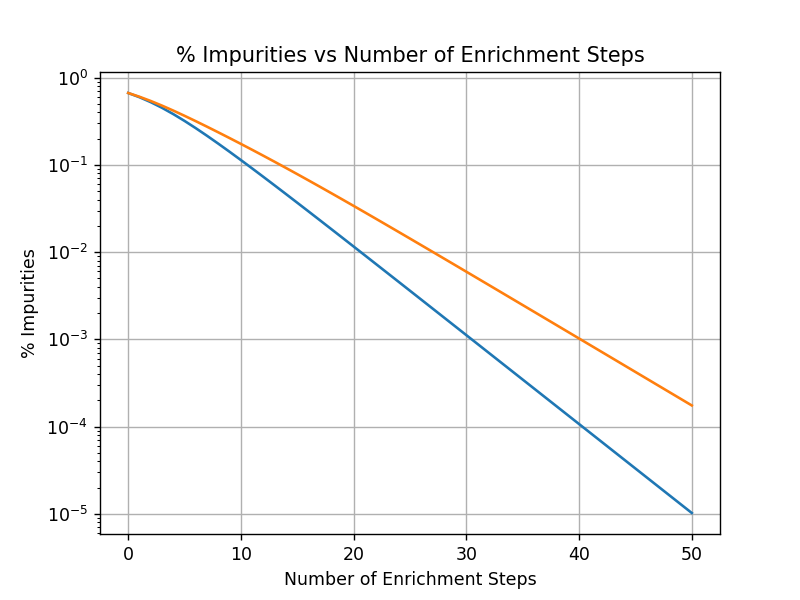

21
28


In [21]:
# calculate multiple enrichment rounds for three REE  (wbpA/3190)

la_mut_fracs = [1/3]
eu_mut_fracs = [1/3]
yb_mut_fracs = [1/3]

la_base_fracs = [1/3]
eu_base_fracs = [1/3]
yb_base_fracs = [1/3]

for i in range(50):
    new_mut_fracs = get_new_fractions3(la_mut_fracs[-1], eu_mut_fracs[-1], yb_mut_fracs[-1], my_seps)
    new_base_fracs = get_new_fractions3(la_base_fracs[-1], eu_base_fracs[-1], yb_base_fracs[-1], base_seps)
    la_mut_fracs.append(new_mut_fracs[0])
    eu_mut_fracs.append(new_mut_fracs[1])
    yb_mut_fracs.append(new_mut_fracs[2])
    
    la_base_fracs.append(new_base_fracs[0])
    eu_base_fracs.append(new_base_fracs[1])
    yb_base_fracs.append(new_base_fracs[2])
    
impurities_mut = np.array(la_mut_fracs) + np.array(yb_mut_fracs)
impurities_base = np.array(la_base_fracs) + np.array(yb_base_fracs)
print(eu_mut_fracs[:20])
print(eu_base_fracs[:20])

plt.figure()

plt.plot(impurities_mut)
plt.plot(impurities_base)
plt.yscale('log')
plt.grid()
plt.title('% Impurities vs Number of Enrichment Steps')
plt.xlabel('Number of Enrichment Steps')
plt.ylabel('% Impurities')

print(find_first(eu_mut_fracs, .99))
print(find_first(eu_base_fracs, .99))